In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# Import and read dataset
from sklearn.datasets import load_iris

iris_data=load_iris(as_frame=True)

In [ ]:
df=iris_data.frame
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
df.shape

(150, 5)

In [ ]:
df['target'].value_counts()

0    50
1    50
2    50
Name: target, dtype: int64

In [ ]:
df.dtypes

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
target                 int64
dtype: object

In [ ]:
df.nunique()

sepal length (cm)    35
sepal width (cm)     23
petal length (cm)    43
petal width (cm)     22
target                3
dtype: int64

In [ ]:
# Null check
df.isna().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

In [ ]:
# Data descriptive stats
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [ ]:
# Train test split
from sklearn.model_selection import train_test_split

X=df.drop('target',axis=1)
y=df['target']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [ ]:
X_train.shape,y_train.shape

((105, 4), (105,))

In [ ]:
X_test.shape,y_test.shape

((45, 4), (45,))

In [ ]:
# Standardization
from sklearn.preprocessing import StandardScaler

stdsc=StandardScaler()
stdsc.fit(X_train)

X_train_std=stdsc.transform(X_train)
X_test_std=stdsc.transform(X_test)

In [ ]:
# Model configs
hidden_layer_sizes = [20, 30]
activation = 'relu'
batch_size = 21
optimizer='sgd'
n_epochs = 100

In [ ]:
# Traning model
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier

losses = []

train_sizes = [0.25, 0.5, 0.75, 1.0]

for train_rows in train_sizes:
    n_rows = int(train_rows * X_train.shape[0])
    X_train_std_subset = X_train_std[:n_rows]
    y_train_subset = y_train[:n_rows]

    mlp = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes, activation=activation,
                        batch_size=batch_size, solver=optimizer, max_iter=n_epochs, random_state=42)

    mlp.fit(X_train_std_subset, y_train_subset)

    losses.append(mlp.loss_curve_)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


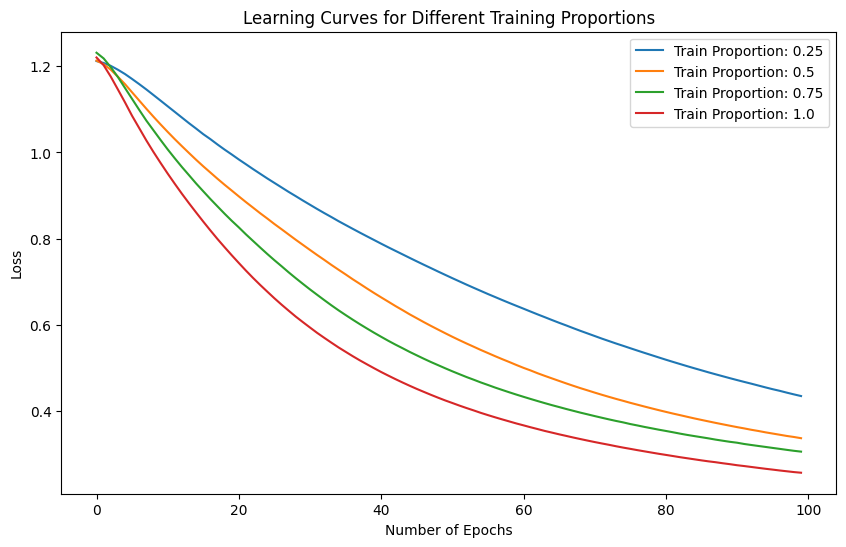

In [ ]:
# Plotting the loss curves
plt.figure(figsize=(10, 6))
for i, loss_curve in enumerate(losses):
    plt.plot(loss_curve, label=f"Train Proportion: {train_sizes[i]}")
plt.xlabel('Number of Epochs')
plt.ylabel('Loss')
plt.title('Learning Curves for Different Training Proportions')
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


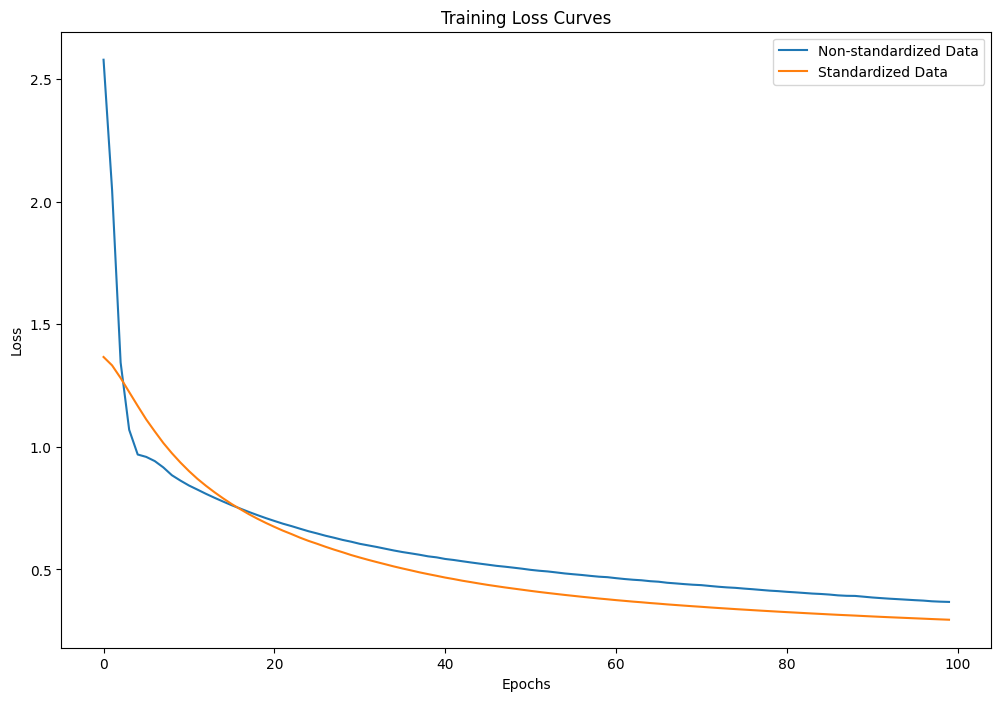

In [ ]:
mlp_params = {
    'hidden_layer_sizes': [20],
    'activation': 'relu',
    'batch_size': 21,
    'solver': 'sgd',
    'max_iter': 100,
    'random_state': 42
}

mlp_non_standard = MLPClassifier(**mlp_params).fit(X_train, y_train)


mlp_standard = MLPClassifier(**mlp_params).fit(X_train_std, y_train)


plt.figure(figsize=(12, 8))
plt.plot(mlp_non_standard.loss_curve_, label='Non-standardized Data')
plt.plot(mlp_standard.loss_curve_, label='Standardized Data')
plt.title('Training Loss Curves')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(



Accuracy: 0.9111111111111111



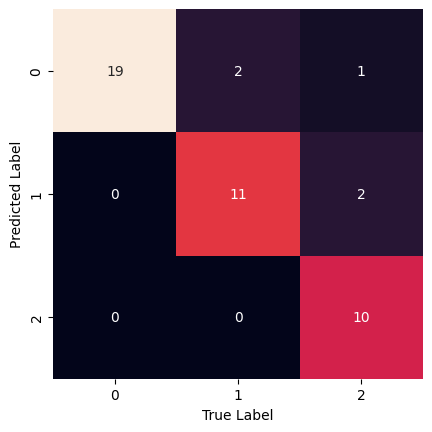

              precision    recall  f1-score   support

           0       0.86      1.00      0.93        19
           1       0.85      0.85      0.85        13
           2       1.00      0.77      0.87        13

    accuracy                           0.89        45
   macro avg       0.90      0.87      0.88        45
weighted avg       0.90      0.89      0.89        45



In [ ]:
import seaborn as sns
from sklearn import metrics
y_pred = mlp_non_standard.predict(X_test_std)
print('\nAccuracy: {}\n'.format(mlp.score(X_test_std,y_test)))
mat = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel("True Label")
plt.ylabel("Predicted Label")
plt.show()

print(metrics.classification_report(y_test, y_pred))
